In [2]:
# idea: find outliers in building and weather data
# label (is_outlier) or drop them and inspect changes on score
# if we drop a whole building we have to drop the building id feature as well(?)
import pandas as pd
# we could also tag them with an outlier indicator

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
building_df = pd.read_csv("../data/raw/building_metadata.csv")

In [7]:
building_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [7]:
building_df.shape

(1449, 6)

In [8]:
min(building_df.square_feet) # 283
any(building_df.square_feet.isna()) # False

False

In [9]:
#np.info(np.log1p) # used in build_features uses log(1+x), better (?) np.log
np.log1p(1000)    # 6.90875477931522
np.log1p(999)     # 6.907755278982137

6.907755278982137

In [10]:
building_log = np.log(building_df['square_feet'])

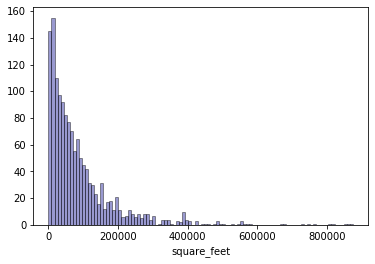

In [11]:
sns.distplot(building_df['square_feet'], hist = True, kde = False,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})

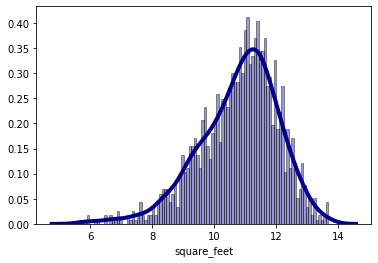

In [12]:
# x-axis is log square_feet! change name 
sns.distplot(building_log, hist = True, kde = True,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})

In [20]:
def label_outlier(variable, df):
    var = df[variable]
    mn = np.mean(var)
    std = np.std(var)
    lower = mn - 2.5*std
    upper = mn + 2.5*std
    is_outlier = (var < lower) | (var > upper)
    return(is_outlier)

In [22]:
building_df["outlier_square_feet"] = label_outlier("square_feet", building_df)

In [23]:
building_df.outlier_square_feet

0       False
1       False
2       False
3       False
4       False
        ...  
1444    False
1445    False
1446    False
1447    False
1448    False
Name: outlier_square_feet, Length: 1449, dtype: bool

In [19]:
sum(outlier_label("square_feet", building_df))

52

In [11]:
building_df.square_feet

0         7432
1         2720
2         5376
3        23685
4       116607
         ...  
1444     19619
1445      4298
1446     11265
1447     29775
1448     92271
Name: square_feet, Length: 1449, dtype: int64

In [13]:
mn = np.mean(building_log)

In [14]:
std = np.std(building_log)

In [15]:
lower =  mn - 2.5*std

In [16]:
upper = mn + 2.5*std

In [17]:
sum(building_log > upper)

0

In [18]:
sum(building_log < lower)

27

In [19]:
sum((building_log > upper) | (building_log < lower))

27

In [20]:
# we can either take the outliers out or flag them with outlier-square
outlier_square = (building_log > upper) | (building_log < lower)

In [24]:
building_df["is_outlier_log_square_meter"] = outlier_square

In [23]:
sum(outlier_square)

27

In [23]:
building_log_dense = building_log[((building_log > lower) & (building_log < upper))]

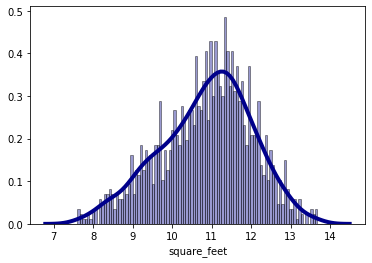

In [24]:
# x-axis is log square_feet! change name 
sns.distplot(building_log_dense, hist = True, kde = True,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})

In [22]:
# also inspect new variable area per floor
sum((building_df['square_feet']/building_df['floor_count']).isna())

1094

In [16]:
building_df['area_per_floor'] = building_df['square_feet']/building_df['floor_count']

In [18]:
sum(outlier_label("area_per_floor", building_df))

4

In [75]:
apf_log = np.log(building_df['area_per_floor'].dropna())

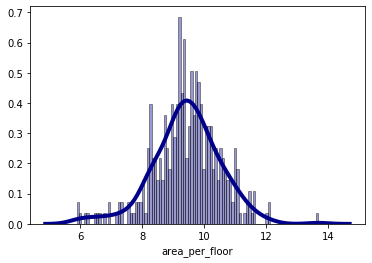

In [76]:
# x-axis is log square_feet! change name 
sns.distplot(apf_log, hist = True, kde = True,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})

In [89]:
mn_apf = np.mean(apf_log)

In [90]:
sd_apf = np.std(apf_log)

In [91]:
apf_upper = mn_adf + 2.5*sd_apf

In [99]:
apf_log[apf_log > upper]

Series([], Name: area_per_floor, dtype: float64)

In [93]:
apf_lower = mn_adf - 2.5*sd_apf

In [95]:
apf_dense = apf_log[(apf_log > lower) & (apf_log < upper)]

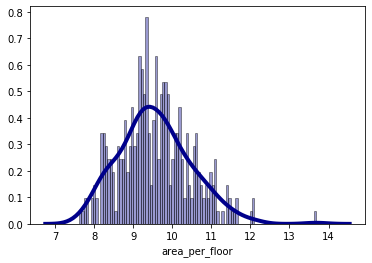

In [96]:
# x-axis is log square_feet! change name 
sns.distplot(apf_dense, hist = True, kde = True,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})

In [104]:
# label outlier square_feet
# after log transforming square feet
# log(sf), log(sf/fl) log(sf) - log(fl)
np.log(5/3)
#np.log(5) - np.log(3)


0.5108256237659907

In [113]:
log_fl = np.log(building_df["floor_count"])
building_df["floor_count"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1444   NaN
1445   NaN
1446   NaN
1447   NaN
1448   NaN
Name: floor_count, Length: 1449, dtype: float64

In [106]:
log_sf = np.log(building_df["square_feet"])

In [107]:
log_n = log_sf - log_fl

In [110]:
apf_log

105      9.222723
106      7.203033
107      9.185351
108      9.699902
109      9.158959
          ...    
1051    10.254356
1052    10.028026
1054    10.844461
1055     9.984076
1057     8.793764
Name: area_per_floor, Length: 355, dtype: float64

In [120]:
len(log_n) - sum(log_n.isna())

355

In [ ]:
def outlier_label(variable, df):
    var = df.variable
    mn = np.mean(var)
    std = np.std(var)
    lower = mn - 2.5*std
    upper = mn + 2.5*std
    is_outlier = (var < lower) | (var > upper)
    return(is_outlier)